- [Dados de covid](https://brasil.io/)
- [Ações do Google](https://finance.yahoo.com/quote/GOOG/history?p=GOOG)
- [Dados refugiados](https://www.migrationdataportal.org/international-data?i=refug_host&t=2021&cm49=76)
- Corrente elétrica que passa por um resistor

In [1]:
import pandas as pd

In [56]:
solcitacao_refugiados = pd.read_csv("datasets/refug.csv", sep="\t",parse_dates=[-1], infer_datetime_format=True)

In [57]:
solcitacao_refugiados.head()

,STATUS,DATA SOLICITAÇÃO,PAÍS DE ORIGEM,GÊNERO,ANO DE NASCIMENTO,CIDADE SOLICITAÇÃO,DATA DA DECISÃO
0,ELEGIBILIDADE - DEFERIDO,2014,PAQUISTÃO,M,1987,BRASÍLIA,2019-01-25
1,ELEGIBILIDADE - DEFERIDO,2017,CUBA,M,1996,RECIFE,2019-01-25
2,ELEGIBILIDADE - DEFERIDO,2015,QUÊNIA,F,2002,BELO HORIZONTE,2019-01-25
3,ELEGIBILIDADE - DEFERIDO,2015,QUÊNIA,F,2007,BELO HORIZONTE,2019-01-25
4,ELEGIBILIDADE - DEFERIDO,2015,QUÊNIA,M,2012,BELO HORIZONTE,2019-01-25


In [65]:
solcitacao_refugiados[solcitacao_refugiados['STATUS']=="ELEGIBILIDADE - DEFERIDO"]

,STATUS,DATA SOLICITAÇÃO,PAÍS DE ORIGEM,GÊNERO,ANO DE NASCIMENTO,CIDADE SOLICITAÇÃO,DATA DA DECISÃO
0,ELEGIBILIDADE - DEFERIDO,2014,PAQUISTÃO,M,1987,BRASÍLIA,2019-01-25
1,ELEGIBILIDADE - DEFERIDO,2017,CUBA,M,1996,RECIFE,2019-01-25
2,ELEGIBILIDADE - DEFERIDO,2015,QUÊNIA,F,2002,BELO HORIZONTE,2019-01-25
3,ELEGIBILIDADE - DEFERIDO,2015,QUÊNIA,F,2007,BELO HORIZONTE,2019-01-25
4,ELEGIBILIDADE - DEFERIDO,2015,QUÊNIA,M,2012,BELO HORIZONTE,2019-01-25
...,...,...,...,...,...,...,...
54522,ELEGIBILIDADE - DEFERIDO,2019,AFEGANISTÃO,M,1994,SÃO PAULO,2020-12-02
54523,ELEGIBILIDADE - DEFERIDO,2020,SÍRIA,M,1991,a definir,2020-12-02
54524,ELEGIBILIDADE - DEFERIDO,2017,IÊMEN,M,1988,SÃO PAULO,2020-12-02
54525,ELEGIBILIDADE - DEFERIDO,2017,SÍRIA,M,1990,BRASÍLIA,2020-12-02


In [66]:
cols_filtro = list(solcitacao_refugiados.columns[[3,6]])
refugiados_MF = solcitacao_refugiados[solcitacao_refugiados['STATUS']=="ELEGIBILIDADE - DEFERIDO"][cols_filtro]
refugiados_MF

,GÊNERO,DATA DA DECISÃO
0,M,2019-01-25
1,M,2019-01-25
2,F,2019-01-25
3,F,2019-01-25
4,M,2019-01-25
...,...,...
54522,M,2020-12-02
54523,M,2020-12-02
54524,M,2020-12-02
54525,M,2020-12-02


In [67]:
grupos = refugiados_MF.groupby(by=cols_filtro[1])

In [46]:
cnt_refugiados = refugiados_MF.groupby(by=cols_filtro[1]).size().values

array([17082,   541,   241,  8299,   196,   235,   216])

In [68]:
sorted(list(grupos.groups.keys()))

[Timestamp('2019-01-25 00:00:00'),
 Timestamp('2019-03-29 00:00:00'),
 Timestamp('2019-04-30 00:00:00'),
 Timestamp('2019-06-14 00:00:00'),
 Timestamp('2019-07-24 00:00:00'),
 Timestamp('2019-09-12 00:00:00'),
 Timestamp('2019-10-03 00:00:00'),
 Timestamp('2019-11-13 00:00:00'),
 Timestamp('2019-12-05 00:00:00'),
 Timestamp('2020-01-31 00:00:00'),
 Timestamp('2020-06-04 00:00:00'),
 Timestamp('2020-08-28 00:00:00'),
 Timestamp('2020-09-25 00:00:00'),
 Timestamp('2020-11-20 00:00:00'),
 Timestamp('2020-12-02 00:00:00')]

In [69]:
dict_count = {
    "Data": grupos.groups.keys(),
    "Numero solicitacoes": refugiados_MF.groupby(by=cols_filtro[1]).size().values
}
df_count_pedido = pd.DataFrame(dict_count)

<AxesSubplot:xlabel='Data'>

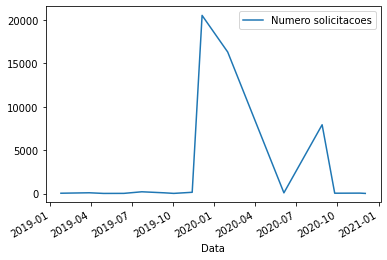

In [70]:
df_count_pedido.plot(x='Data')

In [93]:
colunas = "Year", "Country of Origin", "Country of Asylum", "Refugees under UNHCR’s mandate", "Asylum seekers", "IDPs of concern to UNHCR", "Venezuelans displaced abroad",  "Stateless persons", "Others of concern"

In [74]:
refugiados_brasil = pd.read_csv("datasets/refugees_br.csv.csv",sep='\t', header=None)

In [84]:
refugiados_brasil.sort_values(by=0, inplace=True)

In [90]:
refugiados_brasil[3] = refugiados_brasil[3]*1000

In [92]:
refugiados_brasil[0]

,0,1,2,3,4,5,6,7,8
52,1969,-,Brazil (BRA),40000.0,0.000,0,NaN,0,0.000
51,1970,-,Brazil (BRA),40000.0,0.000,0,NaN,0,0.000
33,1971,-,Brazil (BRA),38000.0,0.000,0,NaN,0,0.000
32,1972,-,Brazil (BRA),37000.0,0.000,0,NaN,0,0.000
50,1973,-,Brazil (BRA),35200.0,0.000,0,NaN,0,0.000
49,1974,-,Brazil (BRA),34000.0,0.000,0,NaN,0,0.000
48,1975,-,Brazil (BRA),32000.0,0.000,0,NaN,0,0.000
47,1976,-,Brazil (BRA),30000.0,0.000,0,NaN,0,0.000
46,1977,-,Brazil (BRA),36000.0,0.000,0,NaN,0,0.000
45,1978,-,Brazil (BRA),35000.0,0.000,0,NaN,0,0.000
